In [9]:
import torch
from torchvision import datasets
import torchvision.transforms as transforms
import matplotlib.pyplot as plt

In [10]:
torch.cuda.is_available()

True

In [11]:
transform = transforms.Compose([
    transforms.Resize([128,128]),
    transforms.Grayscale(),
    transforms.ToTensor()])

data = datasets.ImageFolder('../DataBase', transform=transform)

validation_ratio = .2
test_ratio = .1

validation_len = int(len(data) * validation_ratio)
test_len = int(len(data) * test_ratio)
train_len = len(data) - validation_len - test_len 

train_set, val_set, test_set = torch.utils.data.random_split(data, [train_len, validation_len, test_len])

train_loader = torch.utils.data.DataLoader(dataset = train_set, batch_size = 16, shuffle = True)
val_loader = torch.utils.data.DataLoader(dataset = val_set, batch_size = 16, shuffle = True)
test_loader = torch.utils.data.DataLoader(dataset = test_set, batch_size = 16, shuffle = True)

X train batch size : torch.Size([16, 1, 128, 128]), data type : torch.float32, Memory usage : 1048576 bytes
Y train batch size : torch.Size([16]), data type : torch.int64, Memory usage : 64 bytes


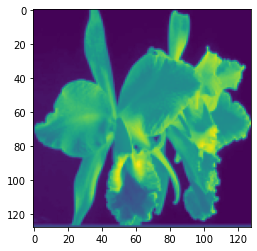

In [33]:
batch = next(iter(train_loader))
print('X train batch size : {}, data type : {}, Memory usage : {} bytes'.format(batch[0].shape, batch[0].dtype, batch[0].element_size()*batch[0].nelement()))
print('Y train batch size : {}, data type : {}, Memory usage : {} bytes'.format(batch[1].shape, batch[1].dtype, batch[0].element_size()*batch[1].nelement()))

img = batch[0][0].numpy().transpose((1,2,0))
plt.imshow(img)

In [35]:
!python main.py

hello world
cuda
626127872


Traceback (most recent call last):
  File "C:\Users\pheli\Documents\Projet_perso\FlowerGenerator\src\main.py", line 71, in <module>
    main()
  File "C:\Users\pheli\Documents\Projet_perso\FlowerGenerator\src\main.py", line 63, in main
    optimizer.step()
  File "C:\Users\pheli\miniconda3\envs\dev_gpu\lib\site-packages\torch\optim\optimizer.py", line 88, in wrapper
    return func(*args, **kwargs)
  File "C:\Users\pheli\miniconda3\envs\dev_gpu\lib\site-packages\torch\autograd\grad_mode.py", line 27, in decorate_context
    return func(*args, **kwargs)
  File "C:\Users\pheli\miniconda3\envs\dev_gpu\lib\site-packages\torch\optim\adam.py", line 125, in step
    state['exp_avg_sq'] = torch.zeros_like(p, memory_format=torch.preserve_format)
RuntimeError: CUDA out of memory. Tried to allocate 32.00 MiB (GPU 0; 2.00 GiB total capacity; 1.70 GiB already allocated; 0 bytes free; 1.70 GiB reserved in total by PyTorch) If reserved memory is >> allocated memory try setting max_split_size_mb to av